In [56]:
import pandas as pd
import numpy as np
import pmdarima
import arch
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 300

In [5]:
df = pd.read_csv('./nasdaq_d_2012_2022.csv',header='infer',usecols=["date","open","high","low","close","adjcp","volume","tic","day"])
df.head()

,date,open,high,low,close,adjcp,volume,tic,day
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575917,302220800.0,AAPL,1
1,2012-01-03,28.700001,29.010000,28.510000,28.570000,28.570000,4495100.0,ADBE,1
2,2012-01-03,36.459999,36.709999,35.910000,36.029999,28.122229,3021500.0,ADI,1
3,2012-01-03,48.191395,48.279194,47.761192,47.813873,37.314682,2898755.0,ADP,1
4,2012-01-03,31.219999,31.830000,30.770000,30.809999,30.809999,2684000.0,ADSK,1


In [6]:
dt = df.pivot(index="date",columns="tic", values="adjcp").fillna(method="bfill") # transform to the standard format
dt = dt.loc['2018-05-31':] 
dt.head(400)

tic,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,ZM,ZS
date,,,,,,,,,,,,,,,,,,,,,
2018-05-31,44.979347,144.710007,249.279999,89.971443,119.587807,129.100006,59.932617,331.950012,48.272896,13.730000,...,56.945999,101.199142,104.027374,130.440002,154.000000,54.143490,130.960007,40.696541,62.000000,26.260000
2018-06-01,45.790504,144.710007,251.309998,91.100914,122.080368,133.520004,58.812469,333.089996,49.660820,14.400000,...,58.363998,103.812553,105.035927,132.570007,152.050003,54.551361,126.290001,39.999191,62.000000,28.180000
2018-06-04,46.173214,144.710007,253.339996,92.563736,123.478409,135.570007,58.256813,343.200012,49.708351,14.850000,...,59.348000,104.662567,105.770294,134.869995,149.649994,54.933212,128.149994,39.462761,62.000000,29.209999
2018-06-05,46.529449,144.710007,252.699997,93.174774,123.312859,136.800003,57.586475,346.079987,50.297741,14.850000,...,58.226002,106.398811,106.749458,135.830002,145.720001,54.577400,128.710007,38.729656,62.000000,30.129999
2018-06-06,46.690716,144.710007,253.949997,94.526474,125.179985,137.929993,56.281105,346.369995,49.936497,15.670000,...,63.900002,106.805748,107.141151,137.110001,145.970001,54.803043,128.309998,37.862438,62.000000,30.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,69.938202,144.710007,329.640015,114.817551,161.975952,183.910004,86.959236,277.890015,60.144634,46.540001,...,85.050003,121.183968,147.085648,192.750000,220.559998,53.293999,166.190002,59.163475,66.459999,47.740002
2019-12-26,71.325798,144.710007,331.200012,114.827141,162.395386,184.240005,86.996300,278.260010,59.958817,46.630001,...,86.188004,121.136833,146.750412,193.710007,220.250000,53.796341,165.360001,59.097591,67.449997,48.160000
2019-12-27,71.298729,144.710007,330.790009,114.558609,162.795792,185.380005,87.283569,277.640015,59.821899,46.180000,...,86.075996,121.221687,146.503891,194.050003,220.970001,53.905949,165.850006,59.408180,66.639999,47.610001


In [7]:
port_l = ['TSLA', 'NVDA', 'AMD', 'AVGO', 'ALGN', 'LRCX', 'FTNT', 'ODFL', 'AMAT','MSFT', 'MU', 'IDXX', 'KLAC', 'CDNS', 'MRVL', 'ASML', 'FB', 'CTAS','INTU', 'SNPS']
port_dt = dt.loc[:,port_l]

In [8]:
port_dt.head()

tic,TSLA,NVDA,AMD,AVGO,ALGN,LRCX,FTNT,ODFL,AMAT,MSFT,MU,IDXX,KLAC,CDNS,MRVL,ASML,FB,CTAS,INTU,SNPS
date,,,,,,,,,,,,,,,,,,,,
2018-05-31,56.945999,62.536575,13.73,218.495712,331.950012,184.964142,61.180000,102.378204,48.272896,94.606125,57.369965,208.210007,105.465858,42.450001,20.860540,190.805862,191.779999,174.580627,195.784775,88.070000
2018-06-01,58.363998,63.883080,14.40,222.196976,333.089996,189.164032,62.000000,104.610100,49.660820,96.472580,58.515572,215.360001,107.896866,43.209999,21.470669,196.152145,193.990005,176.793411,198.193314,89.459999
2018-06-04,59.348000,65.675919,14.85,223.956619,343.200012,190.946671,62.470001,101.170357,49.708351,97.314880,58.874191,218.809998,108.269455,43.419998,21.393194,197.859818,193.279999,178.948715,201.029037,89.680000
2018-06-05,58.226002,65.730492,14.85,224.728043,346.079987,189.398392,63.200001,101.433151,50.297741,97.812614,59.183010,217.449997,110.029846,43.689999,21.335087,203.099365,192.940002,181.841660,202.223557,90.300003
2018-06-06,63.900002,65.750313,15.67,228.420639,346.369995,187.305862,63.290001,103.509262,49.936497,98.099762,59.192970,219.509995,109.377846,44.119999,21.412561,207.261856,191.339996,182.895355,203.456879,91.430000


In [97]:
from statsmodels.tsa.stattools import adfuller as ADF
print(f'ADF: p = {ADF(close.diff(1).diff(1).dropna())}')


ADF: p = (-11.290349872031328, 1.3847697772253548e-20, 20, 882, {'1%': -3.4377858660487277, '5%': -2.86482248517442, '10%': -2.5685178285796555}, 7576.422130388439)


In [90]:
from statsmodels.tsa.arima.model import ARIMA
data = close[step:step+win_size] # training data
ps = range(0, 6)
qs = range(0, 6)
AIC = []
BIC = []
best_p = 0
best_q = 0
best_aic = float('inf')
best_bic = float('inf')
for p in ps:
    at = []
    bt = []
    for q in qs:
        try:
            model = ARIMA(data,order = (p,1,q)).fit()
            at.append(model.aic)
            bt.append(model.bic)
            if model.aic<best_aic:
                p_besta = p
                q_besta = q
                best_aic = model.aic
            if model.bic<best_bic:
                p_bestb = p
                q_bestb = q
                best_bic = model.bic
        except:
            at.append(np.nan)
            bt.append(np.nan)
            print(f"Wrong parameters, order ({p},{q}).")
    AIC.append(at)
    BIC.append(bt)
print(f'Best order for AIC is({p_besta},{q_besta}).')
print(f'Best order for BIC is ({p_bestb},{q_bestb}).')

Best order for AIC is(5,5).
Best order for BIC is (0,0).


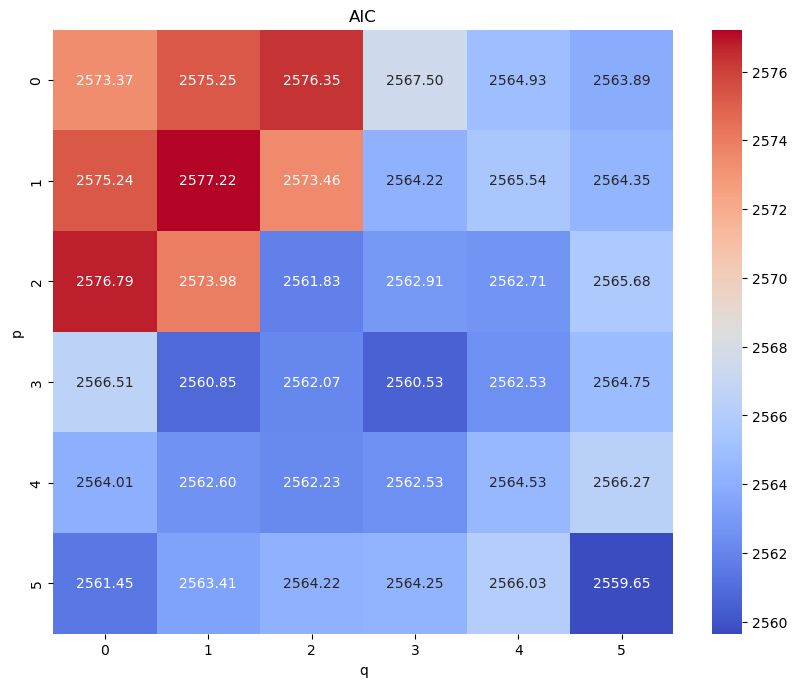

In [98]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8),dpi = 100)
ax = sns.heatmap(AIC,
ax=ax,
annot=True,
fmt='.2f',
cmap = 'coolwarm',
)
ax.set_title('AIC')
ax.set_xlabel('q')
ax.set_ylabel('p')
plt.savefig("./AIC.png")
plt.show()

In [76]:
close = dt['TSLA']
step = 150
win_size = 400

In [77]:
win_dt = close[step:step+win_size]
arima_model = pmdarima.auto_arima(win_dt)
p, d, q = arima_model.order
print(p,d,q)
arima_residuals = arima_model.arima_res_.resid
# # fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_model = garch.fit()
# # Use ARIMA to predict mu
predicted_mu = arima_model.predict(n_periods=1)[0]
# # Use GARCH to predict the residual
garch_forecast = garch_model.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# # Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et
# tem.append(prediction)
print(step)

2 2 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3914735465.099521
Iteration:      2,   Func. Count:     13,   Neg. LLF: 11337.981003826026
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1205.5103143501879
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1308.664341759039
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1084.5650755302263
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1252.8493800094093
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1084.4386196570667
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1084.4318703225442
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1084.431853432118
Iteration:     10,   Func. Count:     58,   Neg. LLF: 1084.4318532425405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1084.431853432118
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
150


In [85]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(2, 2, 3)   Log Likelihood               -1273.178
Date:                Sat, 21 May 2022   AIC                           2558.356
Time:                        21:09:40   BIC                           2582.274
Sample:                             0   HQIC                          2567.830
                                - 400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4770      0.068    -21.583      0.000      -1.611      -1.343
ar.L2         -0.8350      0.066    -12.579      0.000      -0.965      -0.705
ma.L1          0.4683      0.079      5.950      0.000       0.314       0.622
ma.L2         -0.6923      0.041    -16.760      0.000      -0.773      -0.611
ma.L3         -0.7308      0.076     -9.611      0.000      -0.880      -0.582
sigma2        34.8196      1.157     30.102      0.000      32.552      37.087
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              1087.25
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):              33.81   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

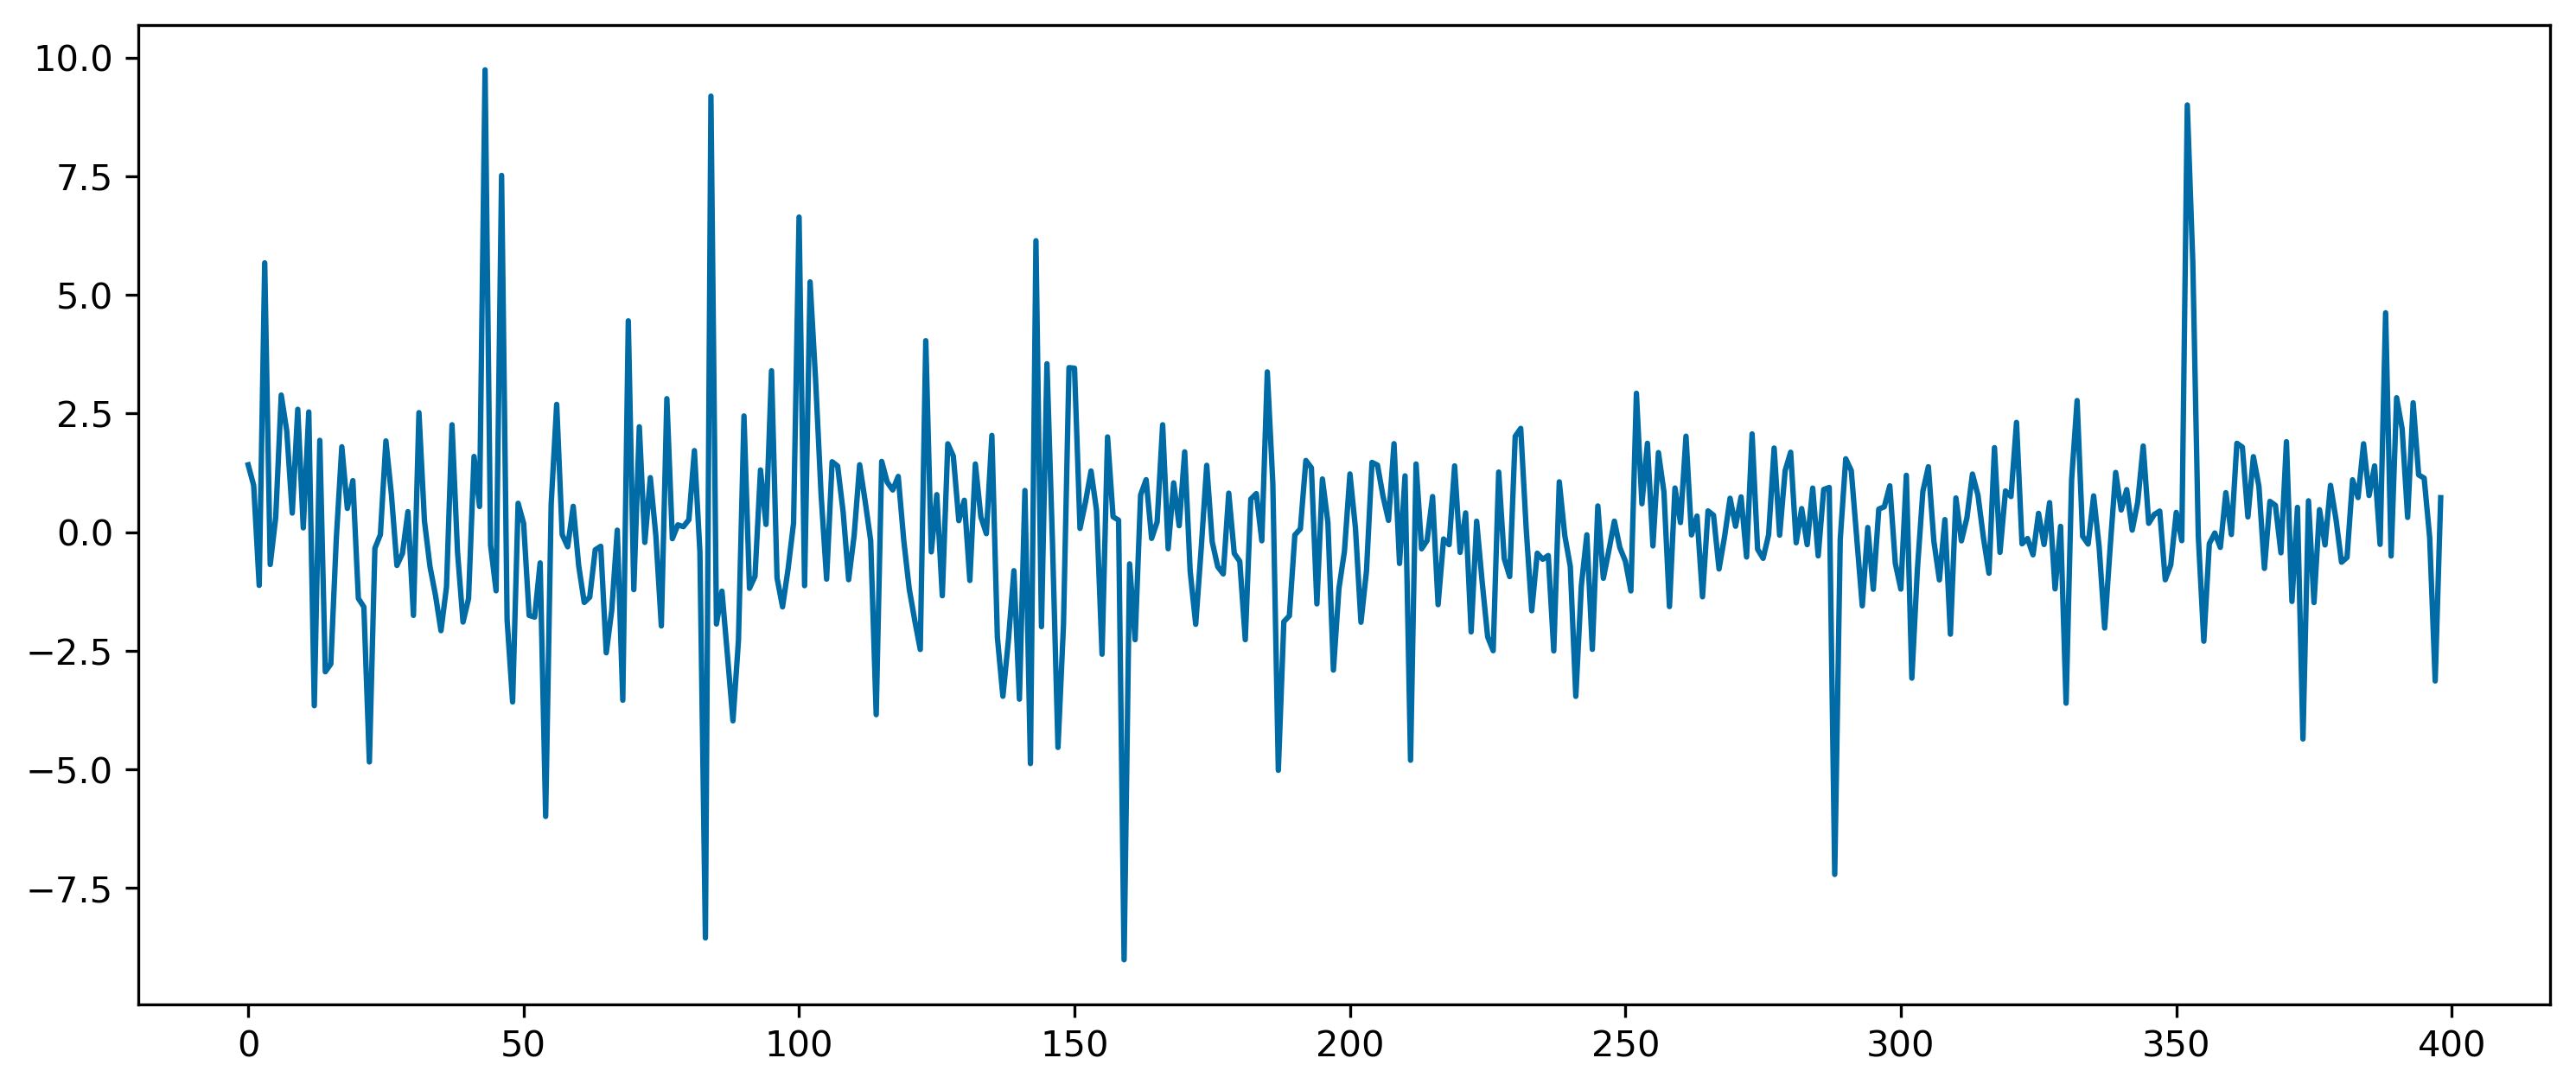

In [66]:
# plt.figure()
plt.plot(arima_residuals[1:])
plt.savefig('./test.jpg')

In [129]:
%%time
n = len(port_dt)
win_size = 400
pred = pd.DataFrame(index = port_dt.loc['2020-01-01':].index)
for tic in port_l:
    close = port_dt[tic]
    tem = []
    for step in range(n-win_size):
        win_dt = close[step:step+win_size]
        arima_model = pmdarima.auto_arima(win_dt)
        p, d, q = arima_model.order
        print(p,d,q)
        arima_residuals = arima_model.arima_res_.resid
        # # fit a GARCH(1,1) model on the residuals of the ARIMA model
        garch = arch.arch_model(arima_residuals, p=1, q=1)
        garch_model = garch.fit()
        # # Use ARIMA to predict mu
        predicted_mu = arima_model.predict(n_periods=1)[0]
        # # Use GARCH to predict the residual
        garch_forecast = garch_model.forecast(horizon=1)
        predicted_et = garch_forecast.mean['h.1'].iloc[-1]
        # # Combine both models' output: yt = mu + et
        prediction = predicted_mu + predicted_et
        tem.append(prediction)
        print(step)
    pred[tic] = tem
# pred.to_csv('./prediction.csv')
    

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 11625728743.21333
Iteration:      2,   Func. Count:     13,   Neg. LLF: 370375013.714705
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1168.3771923368054
Iteration:      4,   Func. Count:     25,   Neg. LLF: 878.0409230870805
Iteration:      5,   Func. Count:     31,   Neg. LLF: 875.7199301006376
Iteration:      6,   Func. Count:     37,   Neg. LLF: 874.8192745446677
Iteration:      7,   Func. Count:     43,   Neg. LLF: 869.2554842087095
Iteration:      8,   Func. Count:     49,   Neg. LLF: 868.6997162782623
Iteration:      9,   Func. Count:     55,   Neg. LLF: 868.6347165575834
Iteration:     10,   Func. Count:     60,   Neg. LLF: 868.6343785520991
Iteration:     11,   Func. Count:     65,   Neg. LLF: 868.6343745086835
Iteration:     12,   Func. Count:     69,   Neg. LLF: 868.6343745086274
Optimization terminated successfully    (Exit mode 0)
            Current function value: 868.6343745086835
            Iterations

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1879.567766562622
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6277.640492555762
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1800.6112609687616
Iteration:      4,   Func. Count:     29,   Neg. LLF: 904.2317182582685
Iteration:      5,   Func. Count:     35,   Neg. LLF: 892.2656974326326
Iteration:      6,   Func. Count:     41,   Neg. LLF: 913.4474651705949
Iteration:      7,   Func. Count:     47,   Neg. LLF: 880.8487377065698
Iteration:      8,   Func. Count:     52,   Neg. LLF: 880.449813062262
Iteration:      9,   Func. Count:     57,   Neg. LLF: 880.344005743636
Iteration:     10,   Func. Count:     62,   Neg. LLF: 880.3290630014428
Iteration:     11,   Func. Count:     67,   Neg. LLF: 880.3250860745538
Iteration:     12,   Func. Count:     72,   Neg. LLF: 880.3183912971372
Iteration:     13,   Func. Count:     77,   Neg. LLF: 880.3182928318795
Iteration:     14,   Func. Count:     82,   Neg. LLF: 880.3

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3839.8095128669374
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5980223773.66693
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1628.7229280168185
Iteration:      4,   Func. Count:     27,   Neg. LLF: 898.8217630982018
Iteration:      5,   Func. Count:     33,   Neg. LLF: 909.9271127363594
Iteration:      6,   Func. Count:     39,   Neg. LLF: 902.9518881705135
Iteration:      7,   Func. Count:     45,   Neg. LLF: 897.5486721339196
Iteration:      8,   Func. Count:     51,   Neg. LLF: 896.4903681599851
Iteration:      9,   Func. Count:     57,   Neg. LLF: 886.0489186178346
Iteration:     10,   Func. Count:     62,   Neg. LLF: 885.9894158891703
Iteration:     11,   Func. Count:     68,   Neg. LLF: 885.8711098363638
Iteration:     12,   Func. Count:     73,   Neg. LLF: 885.8520561834407
Iteration:     13,   Func. Count:     78,   Neg. LLF: 885.8479515584959
Iteration:     14,   Func. Count:     83,   Neg. LLF: 885

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4169.185958497224
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5191029882.591589
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1713.2907224300225
Iteration:      4,   Func. Count:     27,   Neg. LLF: 911.7445781488973
Iteration:      5,   Func. Count:     33,   Neg. LLF: 919.8796542399652
Iteration:      6,   Func. Count:     39,   Neg. LLF: 909.156562356965
Iteration:      7,   Func. Count:     45,   Neg. LLF: 900.4168509856996
Iteration:      8,   Func. Count:     51,   Neg. LLF: 899.8072728714593
Iteration:      9,   Func. Count:     56,   Neg. LLF: 899.800026258536
Iteration:     10,   Func. Count:     61,   Neg. LLF: 899.7967716785486
Iteration:     11,   Func. Count:     66,   Neg. LLF: 899.7929355984066
Iteration:     12,   Func. Count:     71,   Neg. LLF: 899.7928232426577
Iteration:     13,   Func. Count:     76,   Neg. LLF: 899.7928198682403
Iteration:     14,   Func. Count:     80,   Neg. LLF: 899.7

2 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 8598.081319909474
Iteration:      2,   Func. Count:     13,   Neg. LLF: 452659225.51255566
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1624.5781644682806
Iteration:      4,   Func. Count:     26,   Neg. LLF: 947.5934639135183
Iteration:      5,   Func. Count:     33,   Neg. LLF: 934.5894280487213
Iteration:      6,   Func. Count:     38,   Neg. LLF: 934.3095556703546
Iteration:      7,   Func. Count:     43,   Neg. LLF: 934.1079787942468
Iteration:      8,   Func. Count:     48,   Neg. LLF: 934.0934476206158
Iteration:      9,   Func. Count:     53,   Neg. LLF: 934.0885066767216
Iteration:     10,   Func. Count:     58,   Neg. LLF: 934.088395324583
Iteration:     11,   Func. Count:     63,   Neg. LLF: 934.0883863922891
Iteration:     12,   Func. Count:     67,   Neg. LLF: 934.0883863923716
Optimization terminated successfully    (Exit mode 0)
            Current function value: 934.0883863922891
            Iteration

2 2 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3918.4708788125063
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2392318928.1651897
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1824.3489948044432
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1088.8855312271617
Iteration:      5,   Func. Count:     33,   Neg. LLF: 947.7833157414086
Iteration:      6,   Func. Count:     39,   Neg. LLF: 943.5845054494937
Iteration:      7,   Func. Count:     44,   Neg. LLF: 943.5741775545202
Iteration:      8,   Func. Count:     49,   Neg. LLF: 943.5732557331322
Iteration:      9,   Func. Count:     54,   Neg. LLF: 943.5728526995123
Iteration:     10,   Func. Count:     59,   Neg. LLF: 943.5728506572866
Iteration:     11,   Func. Count:     63,   Neg. LLF: 943.5728506572611
Optimization terminated successfully    (Exit mode 0)
            Current function value: 943.5728506572866
            Iterations: 11
            Function evaluations: 63
            Gradient evalu

1 1 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37916.90068862198
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4842.637593647094
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1644.0634630985778
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1157.487414372136
Iteration:      5,   Func. Count:     32,   Neg. LLF: 957.8298966032573
Iteration:      6,   Func. Count:     38,   Neg. LLF: 962.5053413117686
Iteration:      7,   Func. Count:     44,   Neg. LLF: 954.2353285651354
Iteration:      8,   Func. Count:     49,   Neg. LLF: 954.1756530639121
Iteration:      9,   Func. Count:     54,   Neg. LLF: 954.171850629494
Iteration:     10,   Func. Count:     59,   Neg. LLF: 954.1709148768141
Iteration:     11,   Func. Count:     64,   Neg. LLF: 954.1706890516875
Iteration:     12,   Func. Count:     69,   Neg. LLF: 954.1706666252855
Iteration:     13,   Func. Count:     74,   Neg. LLF: 954.1706658937056
Optimization terminated successfully    (Exit mode 0)
    

1 1 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2612063792.3040075
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4339600538.683984
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1722.043224161439
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1191.5098171790949
Iteration:      5,   Func. Count:     33,   Neg. LLF: 968.6103066941856
Iteration:      6,   Func. Count:     38,   Neg. LLF: 968.5575730698042
Iteration:      7,   Func. Count:     43,   Neg. LLF: 968.5482995141085
Iteration:      8,   Func. Count:     48,   Neg. LLF: 968.5453331817978
Iteration:      9,   Func. Count:     53,   Neg. LLF: 968.5452339920319
Iteration:     10,   Func. Count:     58,   Neg. LLF: 968.5452211147895
Iteration:     11,   Func. Count:     63,   Neg. LLF: 968.545216533656
Iteration:     12,   Func. Count:     67,   Neg. LLF: 968.5452165337521
Optimization terminated successfully    (Exit mode 0)
            Current function value: 968.545216533656
            Iterations

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 14164297137.808805
Iteration:      2,   Func. Count:     13,   Neg. LLF: 928110510.6794559
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1404.1405767958152
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1946.3942440370206
Iteration:      5,   Func. Count:     33,   Neg. LLF: 975.9641290601113
Iteration:      6,   Func. Count:     38,   Neg. LLF: 975.943974080809
Iteration:      7,   Func. Count:     43,   Neg. LLF: 975.943401222145
Iteration:      8,   Func. Count:     49,   Neg. LLF: 975.9402520357612
Iteration:      9,   Func. Count:     54,   Neg. LLF: 975.9402341808906
Iteration:     10,   Func. Count:     58,   Neg. LLF: 975.9402341816949
Optimization terminated successfully    (Exit mode 0)
            Current function value: 975.9402341808906
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
62
0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1

1 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 24720834825.55914
Iteration:      2,   Func. Count:     13,   Neg. LLF: 577390933.5581145
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1537.91857032506
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1093.2435552073155
Iteration:      5,   Func. Count:     34,   Neg. LLF: 991.7043602492049
Iteration:      6,   Func. Count:     40,   Neg. LLF: 985.104300508594
Iteration:      7,   Func. Count:     45,   Neg. LLF: 985.1042942092979
Iteration:      8,   Func. Count:     49,   Neg. LLF: 985.104294209243
Optimization terminated successfully    (Exit mode 0)
            Current function value: 985.1042942092979
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
72
1 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 25510047476.853477
Iteration:      2,   Func. Count:     13,   Neg. LLF: 562938417.6658988
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1418.

2 1 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 25073068949.454918
Iteration:      2,   Func. Count:     13,   Neg. LLF: 524878949.16818845
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1154.822916048304
Iteration:      4,   Func. Count:     26,   Neg. LLF: 995.6328819909951
Iteration:      5,   Func. Count:     32,   Neg. LLF: 997.501468130827
Iteration:      6,   Func. Count:     38,   Neg. LLF: 993.2402131206338
Iteration:      7,   Func. Count:     43,   Neg. LLF: 993.238281084862
Iteration:      8,   Func. Count:     48,   Neg. LLF: 993.2382345154338
Iteration:      9,   Func. Count:     53,   Neg. LLF: 993.2382337880554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 993.2382337880554
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
83
0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 25713936770.69409
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5480

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34006146408.338593
Iteration:      2,   Func. Count:     13,   Neg. LLF: 423055390.32768804
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1208.9358419805505
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1003.3066895984082
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1801.7090187417716
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1000.6597611120484
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1000.6585355672797
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1000.6585016876081
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1000.6585016871272
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1000.6585016876081
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
93
0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 33321878139.904778
Iteration:      2,   Func. Count:     13,   Neg

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 31877853134.54919
Iteration:      2,   Func. Count:     13,   Neg. LLF: 438846584.62454224
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1191.6514788405846
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1006.5220312050308
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1003.1056916762743
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1003.2520587544249
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1003.063925004609
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1003.0638163871338
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1003.0638163867493
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1003.0638163871338
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
102
0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 30357721655.6762
Iteration:      2,   Func. Count:     13,   Neg. L

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 36207732746.62099
Iteration:      2,   Func. Count:     13,   Neg. LLF: 389587483.7974122
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1242.5921816613316
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1032.3831920175999
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1083.503650650111
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1025.4061259621778
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1025.1701272933228
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1025.1477054813654
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1025.1463511962397
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1025.146346226235
Iteration:     11,   Func. Count:     63,   Neg. LLF: 1025.1463461636813
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1025.146346226235
            Iterations: 11
            Function evaluations: 63
            Gradient ev

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 30264412941.64574
Iteration:      2,   Func. Count:     13,   Neg. LLF: 417627554.0904636
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1251.1076652814531
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1044.9543280493522
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1264.3354565182258
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1035.422597058006
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1035.197248586805
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1035.1534984045727
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1035.1519294184513
Iteration:     10,   Func. Count:     58,   Neg. LLF: 1035.1519241434357
Iteration:     11,   Func. Count:     62,   Neg. LLF: 1035.1519240680743
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1035.1519241434357
            Iterations: 11
            Function evaluations: 62
            Gradient e

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6231230874.899166
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1801111221.8497667
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1221.4422893041076
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1159.0555731714935
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1053.9717345711497
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1207.5842286634875
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1047.8748725875548
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1047.5344699445968
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1047.5116011492773
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1047.5084108960848
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1047.5082178469788
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1047.5082091823501
Iteration:     13,   Func. Count:     74,   Neg. LLF: 1047.5082091822558
Optimization terminated successfully    (Exit 

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 10336815763.920593
Iteration:      2,   Func. Count:     13,   Neg. LLF: 50876.06291253662
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1173.3913907947262
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1063.8890732374862
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1065.0121325493365
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1063.8056206141537
Iteration:      7,   Func. Count:     41,   Neg. LLF: 1389.4365337942932
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1063.7831850369598
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1063.7827523537615
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1063.7827394084918
Iteration:     11,   Func. Count:     63,   Neg. LLF: 1063.7827393503385
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1063.7827394084918
            Iterations: 11
            Function evaluations: 63
            Gradien

3 2 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6320283091.918894
Iteration:      2,   Func. Count:     13,   Neg. LLF: 16834.80569532681
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1193.831775988229
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1082.7977381181947
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1172.5018594404796
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1083.076690611672
Iteration:      7,   Func. Count:     42,   Neg. LLF: 4301.1198703807495
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1081.7790911976372
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1081.4387319872617
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1081.4387298053057
Iteration:     11,   Func. Count:     64,   Neg. LLF: 1081.4387298038505
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1081.4387298053057
            Iterations: 11
            Function evaluations: 64
            Gradient e

3 2 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3438059563.823645
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5106.0452216728445
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1217.044422107434
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1385.5209802613222
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1088.9418407908001
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1310.4619670215031
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1088.8035353510625
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1088.7872598625886
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1088.7872257385472
Iteration:     10,   Func. Count:     58,   Neg. LLF: 1088.7872254857543
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1088.7872257385472
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10
153
0 1 0
Iteration:      1,   Func. Count:      6,   Ne

3 2 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6541599065.322782
Iteration:      2,   Func. Count:     13,   Neg. LLF: 20008.959010118935
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1240.4925478581176
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1157.5157416772233
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1118.7329434781286
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1735.3765275919532
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1118.5110727496096
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1118.4983846103542
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1118.4983411616308
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1118.4983406136357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1118.4983411616308
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
162
3 2 2
Iteration:      1,   Func. Count:      6,   N

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6097.958970846228
Iteration:      2,   Func. Count:     12,   Neg. LLF: 19140.984082594663
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1566.8474080221679
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1267.312408357916
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1246.8247895551747
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1145.7135688836165
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1145.3464443291898
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1141.0611559857389
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1141.0615283781553
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1141.0604912460963
Iteration:     11,   Func. Count:     64,   Neg. LLF: 1141.0603838932698
Iteration:     12,   Func. Count:     68,   Neg. LLF: 1141.0603829695374
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1141.0603838932698
           

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 9985.560297623255
Iteration:      2,   Func. Count:     12,   Neg. LLF: 21118.829499389754
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1268.1596621009944
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1342.1152551786047
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1278.843664872255
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1282.2886555265034
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1235.221900608672
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1167.369035511621
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1163.8919035325357
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1163.8690366991327
Iteration:     11,   Func. Count:     64,   Neg. LLF: 1163.863843250822
Iteration:     12,   Func. Count:     69,   Neg. LLF: 1163.8580444517188
Iteration:     13,   Func. Count:     74,   Neg. LLF: 1163.8579395249235
Iteration:     14,   Func. Count:     79,   Neg. L

4 1 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3680.215692042746
Iteration:      2,   Func. Count:     13,   Neg. LLF: 431714.65988447267
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1274.1406033791911
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1273.7913931525513
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1265.6563342107565
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1264.3965159133827
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1259.3076624219334
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1210.0723658914376
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1204.673885441728
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1204.5729524912047
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1204.5667067279755
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1204.5664982523908
Iteration:     13,   Func. Count:     76,   Neg. LLF: 1204.5660955847725
Iteration:     14,   Func. Count:     80,   Neg

5 1 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2285.158869615388
Iteration:      2,   Func. Count:     13,   Neg. LLF: 41357.9719239942
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1378.78984486422
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1403.4484631646267
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1367.5747592361977
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1362.891458226369
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1346.7308979553216
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1337.6952365400862
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1227.0220091639314
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1206.8204131571963
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1205.5735648734976
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1205.570571186867
Iteration:     13,   Func. Count:     77,   Neg. LLF: 1205.5673728183594
Iteration:     14,   Func. Count:     82,   Neg. LLF

5 1 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 9772132296.107048
Iteration:      2,   Func. Count:     13,   Neg. LLF: 212956.26231503303
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1343.6865246019424
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1413.4243829818224
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1371.3844827672876
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1377.6279711573868
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1350.1493249417422
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1363.885382224547
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1224.1955508477708
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1216.567013568649
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1216.3997881380897
Iteration:     12,   Func. Count:     71,   Neg. LLF: 1216.3685558489897
Iteration:     13,   Func. Count:     76,   Neg. LLF: 1216.3663825932088
Iteration:     14,   Func. Count:     81,   Neg.

2 1 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 16893.79242329082
Iteration:      2,   Func. Count:     12,   Neg. LLF: 59506.000212391285
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1437.585015886807
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1353.3689186264623
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1359.2146229073855
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1352.0682162279863
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1342.2069960025551
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1228.2655102866709
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1230.0951505106364
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1225.061686900433
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1225.0641032485905
Iteration:     12,   Func. Count:     71,   Neg. LLF: 1225.0532124799674
Iteration:     13,   Func. Count:     76,   Neg. LLF: 1225.0532107653632
Iteration:     14,   Func. Count:     80,   Neg.

2 1 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2811933.308592201
Iteration:      2,   Func. Count:     12,   Neg. LLF: 24711.161590967386
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1294.3470597413734
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1368.3765973717063
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1347.9546217788761
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1349.8363900319057
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1342.3652839973454
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1246.5379165330758
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1242.7264874226305
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1242.6886511352477
Iteration:     11,   Func. Count:     64,   Neg. LLF: 1242.6853683469183
Iteration:     12,   Func. Count:     69,   Neg. LLF: 1242.685332480958
Iteration:     13,   Func. Count:     74,   Neg. LLF: 1242.6853285636428
Iteration:     14,   Func. Count:     78,   Neg

217
2 1 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5091.986032849542
Iteration:      2,   Func. Count:     12,   Neg. LLF: 33771.28565412271
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1316.827537160385
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1402.0531896028042
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1372.812445507444
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1372.29433943194
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1365.8293134602663
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1278.0323957010585
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1251.2293396301059
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1249.1304265476638
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1249.1284239354877
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1249.1274096932746
Iteration:     13,   Func. Count:     75,   Neg. LLF: 1249.1274078245278
Iteration:     14,   Func. Count:     79,   Neg

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5765.0315443290365
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4690.961517253512
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1333.5675179044542
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1386.4027842488108
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1381.1354563055486
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1380.1117036926316
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1379.928957367269
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1369.2361261422752
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1290.772564744369
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1277.5187040267522
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1276.4443816761898
Iteration:     12,   Func. Count:     71,   Neg. LLF: 1276.3798752556063
Iteration:     13,   Func. Count:     76,   Neg. LLF: 1276.3763195822235
Iteration:     14,   Func. Count:     81,   Neg.

2 1 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 25827.506772997003
Iteration:      2,   Func. Count:     12,   Neg. LLF: 966425.1997358372
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1365.0606778851875
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1382.7707439930887
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1419.5586575240936
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1379.1064002715127
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1404.3318357161843
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1368.0067392305282
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1298.2452369244863
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1293.3450668663504
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1293.2098980951575
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1293.203343523247
Iteration:     13,   Func. Count:     75,   Neg. LLF: 1293.2026371263923
Iteration:     14,   Func. Count:     80,   Neg

2 1 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3886.26860988827
Iteration:      2,   Func. Count:     12,   Neg. LLF: 627360.9855652308
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1357.127770979242
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1398.838665400296
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1401.090286228372
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1402.681030771498
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1400.810426399237
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1398.5766632448804
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1323.8015977084112
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1307.6553273526997
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1306.6841194385265
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1306.5590396764235
Iteration:     13,   Func. Count:     75,   Neg. LLF: 1306.5324384607097
Iteration:     14,   Func. Count:     80,   Neg. LLF:

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6761.407339722922
Iteration:      2,   Func. Count:     12,   Neg. LLF: 13563.096226144851
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1463.7366900869617
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1459.6779669612974
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1456.6720744649115
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1435.868693688587
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1416.4167137041695
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1582.1624050426003
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1448.8708959147925
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1437.5784575755642
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1438.8630153776323
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1329.8587367434434
Iteration:     13,   Func. Count:     78,   Neg. LLF: 1324.130654022304
Iteration:     14,   Func. Count:     83,   Neg.

1 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 430359.74632071145
Iteration:      2,   Func. Count:     12,   Neg. LLF: 722175.5462594244
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1491.6184401039536
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1485.1302379538342
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1480.250007699014
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1397.365284730823
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1480.0636955439586
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1437.5028027429914
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1476.5736310567586
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1448.3453243457152
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1344.0382644693714
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1338.1205448895525
Iteration:     13,   Func. Count:     77,   Neg. LLF: 1337.9964135150321
Iteration:     14,   Func. Count:     82,   Neg.

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 66209.94480130685
Iteration:      2,   Func. Count:     12,   Neg. LLF: 8418.49025153427
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1506.4108420663752
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1498.5604394804398
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1489.2562504916705
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1490.5663225598034
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1453.9514835701063
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1500.2808627430436
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1457.6968596552044
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1485.5821871481917
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1368.4915410402757
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1355.2056594821297
Iteration:     13,   Func. Count:     77,   Neg. LLF: 1354.5017465943254
Iteration:     14,   Func. Count:     82,   Neg.

0 2 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 15997.869826431166
Iteration:      2,   Func. Count:     12,   Neg. LLF: 271321.9410467785
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1547.5180516067326
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1530.9531823148236
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1519.7652238894934
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1523.397792066286
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1495.0219871417205
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1533.7315537282698
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1656.1305454304768
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1515.2518908401257
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1502.872413424473
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1390.2590556097098
Iteration:     13,   Func. Count:     78,   Neg. LLF: 1380.8026471673147
Iteration:     14,   Func. Count:     83,   Neg.

0 2 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 216316.74265548235
Iteration:      2,   Func. Count:     12,   Neg. LLF: 33247.95400814719
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1560.1061612687533
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1525.8151222420142
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1532.5037824061733
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1522.4883683771861
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1520.4237012071512
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1464.3420137204819
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1518.2709646660194
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1434.5599890386156
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1443.3690155189463
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1394.7898742425255
Iteration:     13,   Func. Count:     77,   Neg. LLF: 1393.8177513691344
Iteration:     14,   Func. Count:     82,   Ne

0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54870.79514487346
Iteration:      2,   Func. Count:     12,   Neg. LLF: 8920.646744804351
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1542.0928881741013
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1542.7694010128603
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1542.6724429367364
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1512.2011421889358
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1520.9114270451605
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1512.6668553140112
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1533.4293485495327
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1534.134045795177
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1433.6492328203565
Iteration:     12,   Func. Count:     73,   Neg. LLF: 1411.7785861437055
Iteration:     13,   Func. Count:     79,   Neg. LLF: 1409.5606048675968
Iteration:     14,   Func. Count:     84,   Neg.

Iteration:     19,   Func. Count:    109,   Neg. LLF: 1415.6478085627255
Iteration:     20,   Func. Count:    114,   Neg. LLF: 1415.6478067410858
Iteration:     21,   Func. Count:    119,   Neg. LLF: 1415.6478816137142
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1415.6478067423507
            Iterations: 22
            Function evaluations: 122
            Gradient evaluations: 21
275
0 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1647791.388144644
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1608.609561486449
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1556.9043624159692
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1524.3463787059502
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1540.0309401788425
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1530.791104291572
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1535.9522123288289
Iteration:      8,   Func. Count:     48,   Neg. LLF

Iteration:     18,   Func. Count:    105,   Neg. LLF: 1430.8717100571412
Iteration:     19,   Func. Count:    110,   Neg. LLF: 1430.856716841217
Iteration:     20,   Func. Count:    115,   Neg. LLF: 1430.8554265473308
Iteration:     21,   Func. Count:    120,   Neg. LLF: 1430.8553998777138
Iteration:     22,   Func. Count:    125,   Neg. LLF: 1430.855396973166
Iteration:     23,   Func. Count:    129,   Neg. LLF: 1430.8553943737634
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1430.855396973166
            Iterations: 23
            Function evaluations: 129
            Gradient evaluations: 23
280
5 2 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 700365.2548205502
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1473.16319740174
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1569.2778672566833
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1548.461129496014
Iteration:      5,   Func. Count:     30,   Neg. LLF: 15

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 76581.2701724563
Iteration:      2,   Func. Count:     12,   Neg. LLF: 719772.328719829
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1597.3580648532266
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1579.021273164858
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1574.032643838456
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1570.9014623214748
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1564.2615095688366
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1554.0089677533733
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1550.7287934943774
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1557.4512408456171
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1556.9386581435972
Iteration:     12,   Func. Count:     73,   Neg. LLF: 1552.5714386953568
Iteration:     13,   Func. Count:     79,   Neg. LLF: 1467.815685585109
Iteration:     14,   Func. Count:     85,   Neg. LLF

291
0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 178019.32151701642
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1816.2352753203086
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1602.4413267097036
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1517.4237769966985
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1516.9396725063825
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1512.041550382563
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1512.9637773797756
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1494.548741265477
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1538.219940236154
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1474.0695959816676
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1471.8217559913355
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1470.7418549098697
Iteration:     13,   Func. Count:     75,   Neg. LLF: 1469.9262883132187
Iteration:     14,   Func. Count:     80,   

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3785.209943970301
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1666.8647529668904
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1550.8266556987369
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1524.5022475998007
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1521.2642854238798
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1575.386844453919
Iteration:      7,   Func. Count:     42,   Neg. LLF: 84920.10465737226
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1524.7678971581397
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1532.7412522892942
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1522.3338356706372
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1519.2723544122514
Iteration:     12,   Func. Count:     73,   Neg. LLF: 1494.4223016841374
Iteration:     13,   Func. Count:     79,   Neg. LLF: 1492.3236504428414
Iteration:     14,   Func. Count:     84,   Neg.

0 1 0
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3453.025099679524
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1700.367076625854
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1567.8611717139254
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1548.1280852356913
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1543.2488480507786
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1540.807798215482
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1888.0239553007175
Iteration:      8,   Func. Count:     49,   Neg. LLF: 28231.730348239667
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1613.244690040362
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1537.649265002287
Iteration:     11,   Func. Count:     69,   Neg. LLF: 1534.159599229799
Iteration:     12,   Func. Count:     75,   Neg. LLF: 1533.8020621127919
Iteration:     13,   Func. Count:     81,   Neg. LLF: 1511.0777865148134
Iteration:     14,   Func. Count:     87,   Neg. LL

2 1 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3607.0976898800986
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1667.3438461633864
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1575.2424735009972
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1551.8695577751855
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1548.4429371520075
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1541.0179199552272
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1581.952756351786
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1538.9452284178815
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1525.1018843260263
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1523.7656167451853
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1523.664648596558
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1523.6168056436086
Iteration:     13,   Func. Count:     75,   Neg. LLF: 1523.6133482284183
Iteration:     14,   Func. Count:     80,   Neg

2 1 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3446.039074289299
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1715.6179900368047
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1587.06448973512
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1569.3267714960052
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1565.7037242449765
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1563.7500683600902
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1551.9148719000752
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1568.9186291140288
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1551.6959594389402
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1542.4771668567034
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1538.874461525038
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1538.8599636270292
Iteration:     13,   Func. Count:     77,   Neg. LLF: 1538.8576998112148
Iteration:     14,   Func. Count:     82,   Neg. 

2 1 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3090.9753540294055
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1735.0418518442157
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1599.9174211663449
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1586.36632893559
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1583.5095309548033
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1577.2884608691882
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1606.4833140415012
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1574.2871410310374
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1563.241388310399
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1561.8859468797837
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1561.8164220556678
Iteration:     12,   Func. Count:     71,   Neg. LLF: 1561.7737573109127
Iteration:     13,   Func. Count:     76,   Neg. LLF: 1561.7640883148797
Iteration:     14,   Func. Count:     81,   Neg.

2 1 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2692.1337359976324
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1743.7348184458763
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1576.2390168719899
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1575.4638557788535
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1583.9467993298442
Iteration:      6,   Func. Count:     35,   Neg. LLF: 1583.8406256050412
Iteration:      7,   Func. Count:     41,   Neg. LLF: 1574.8723662783352
Iteration:      8,   Func. Count:     47,   Neg. LLF: 1574.018569275804
Iteration:      9,   Func. Count:     52,   Neg. LLF: 1574.0090651822243
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1574.0090466879403
Iteration:     11,   Func. Count:     62,   Neg. LLF: 1574.009020625659
Iteration:     12,   Func. Count:     66,   Neg. LLF: 1574.009017843229
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1574.009020625659
            I

KeyboardInterrupt: 

In [103]:
# pred1 = pd.read_csv('./pred1.csv',index_col = 'date')
# pred2 = pd.read_csv('./pred2.csv',index_col = 'date')
# pred = pd.merge(pred1,pred2,left_index=True,right_index=True)
# pred.to_csv('./prediction.csv')
pred = pd.read_csv('./prediction.csv')

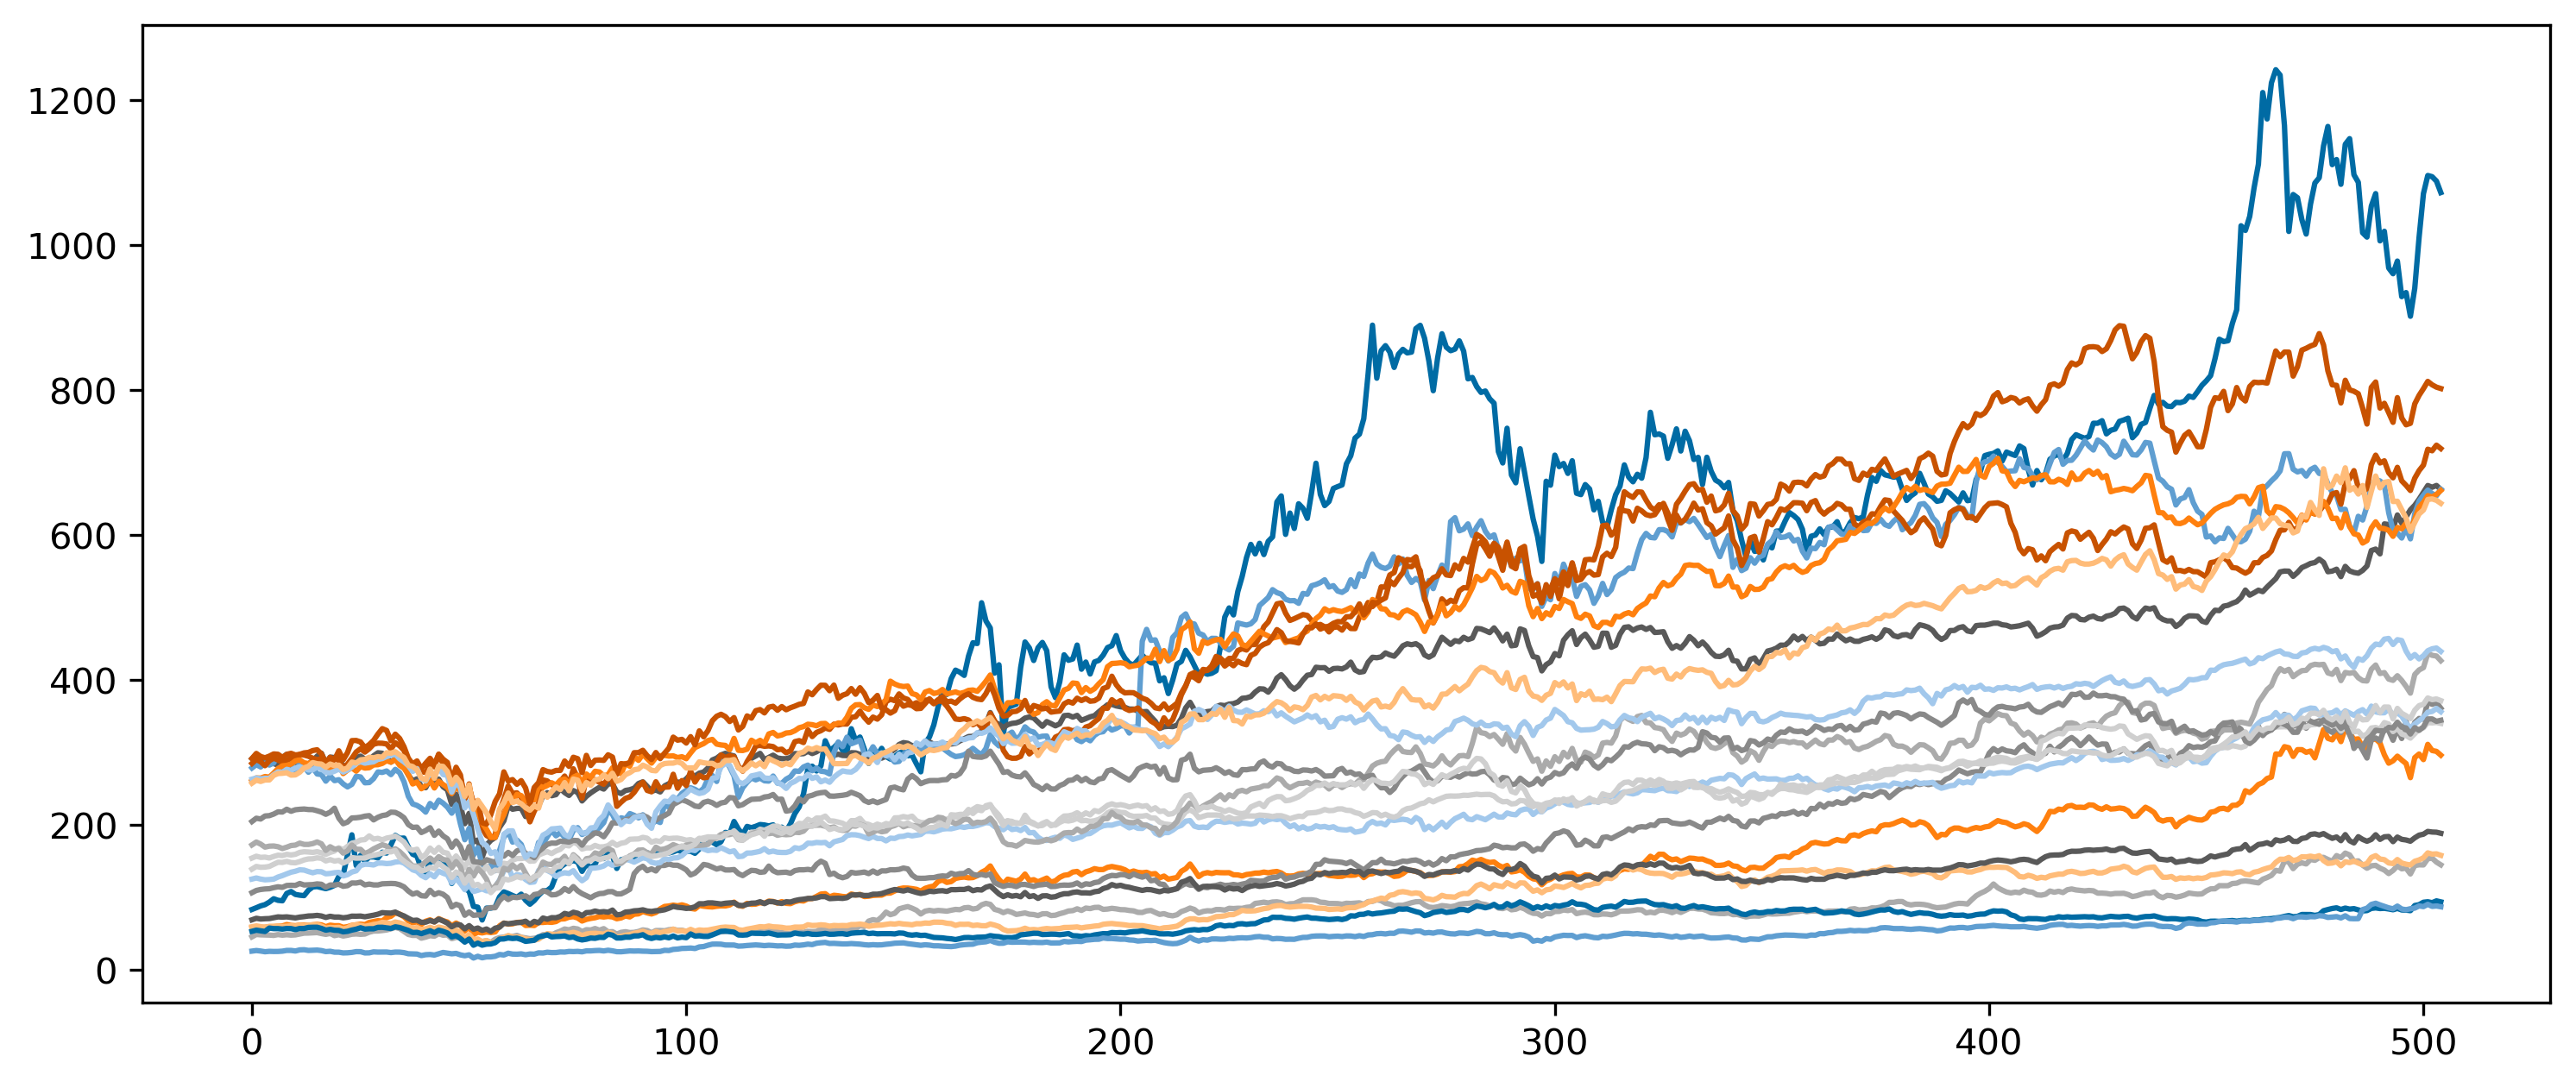

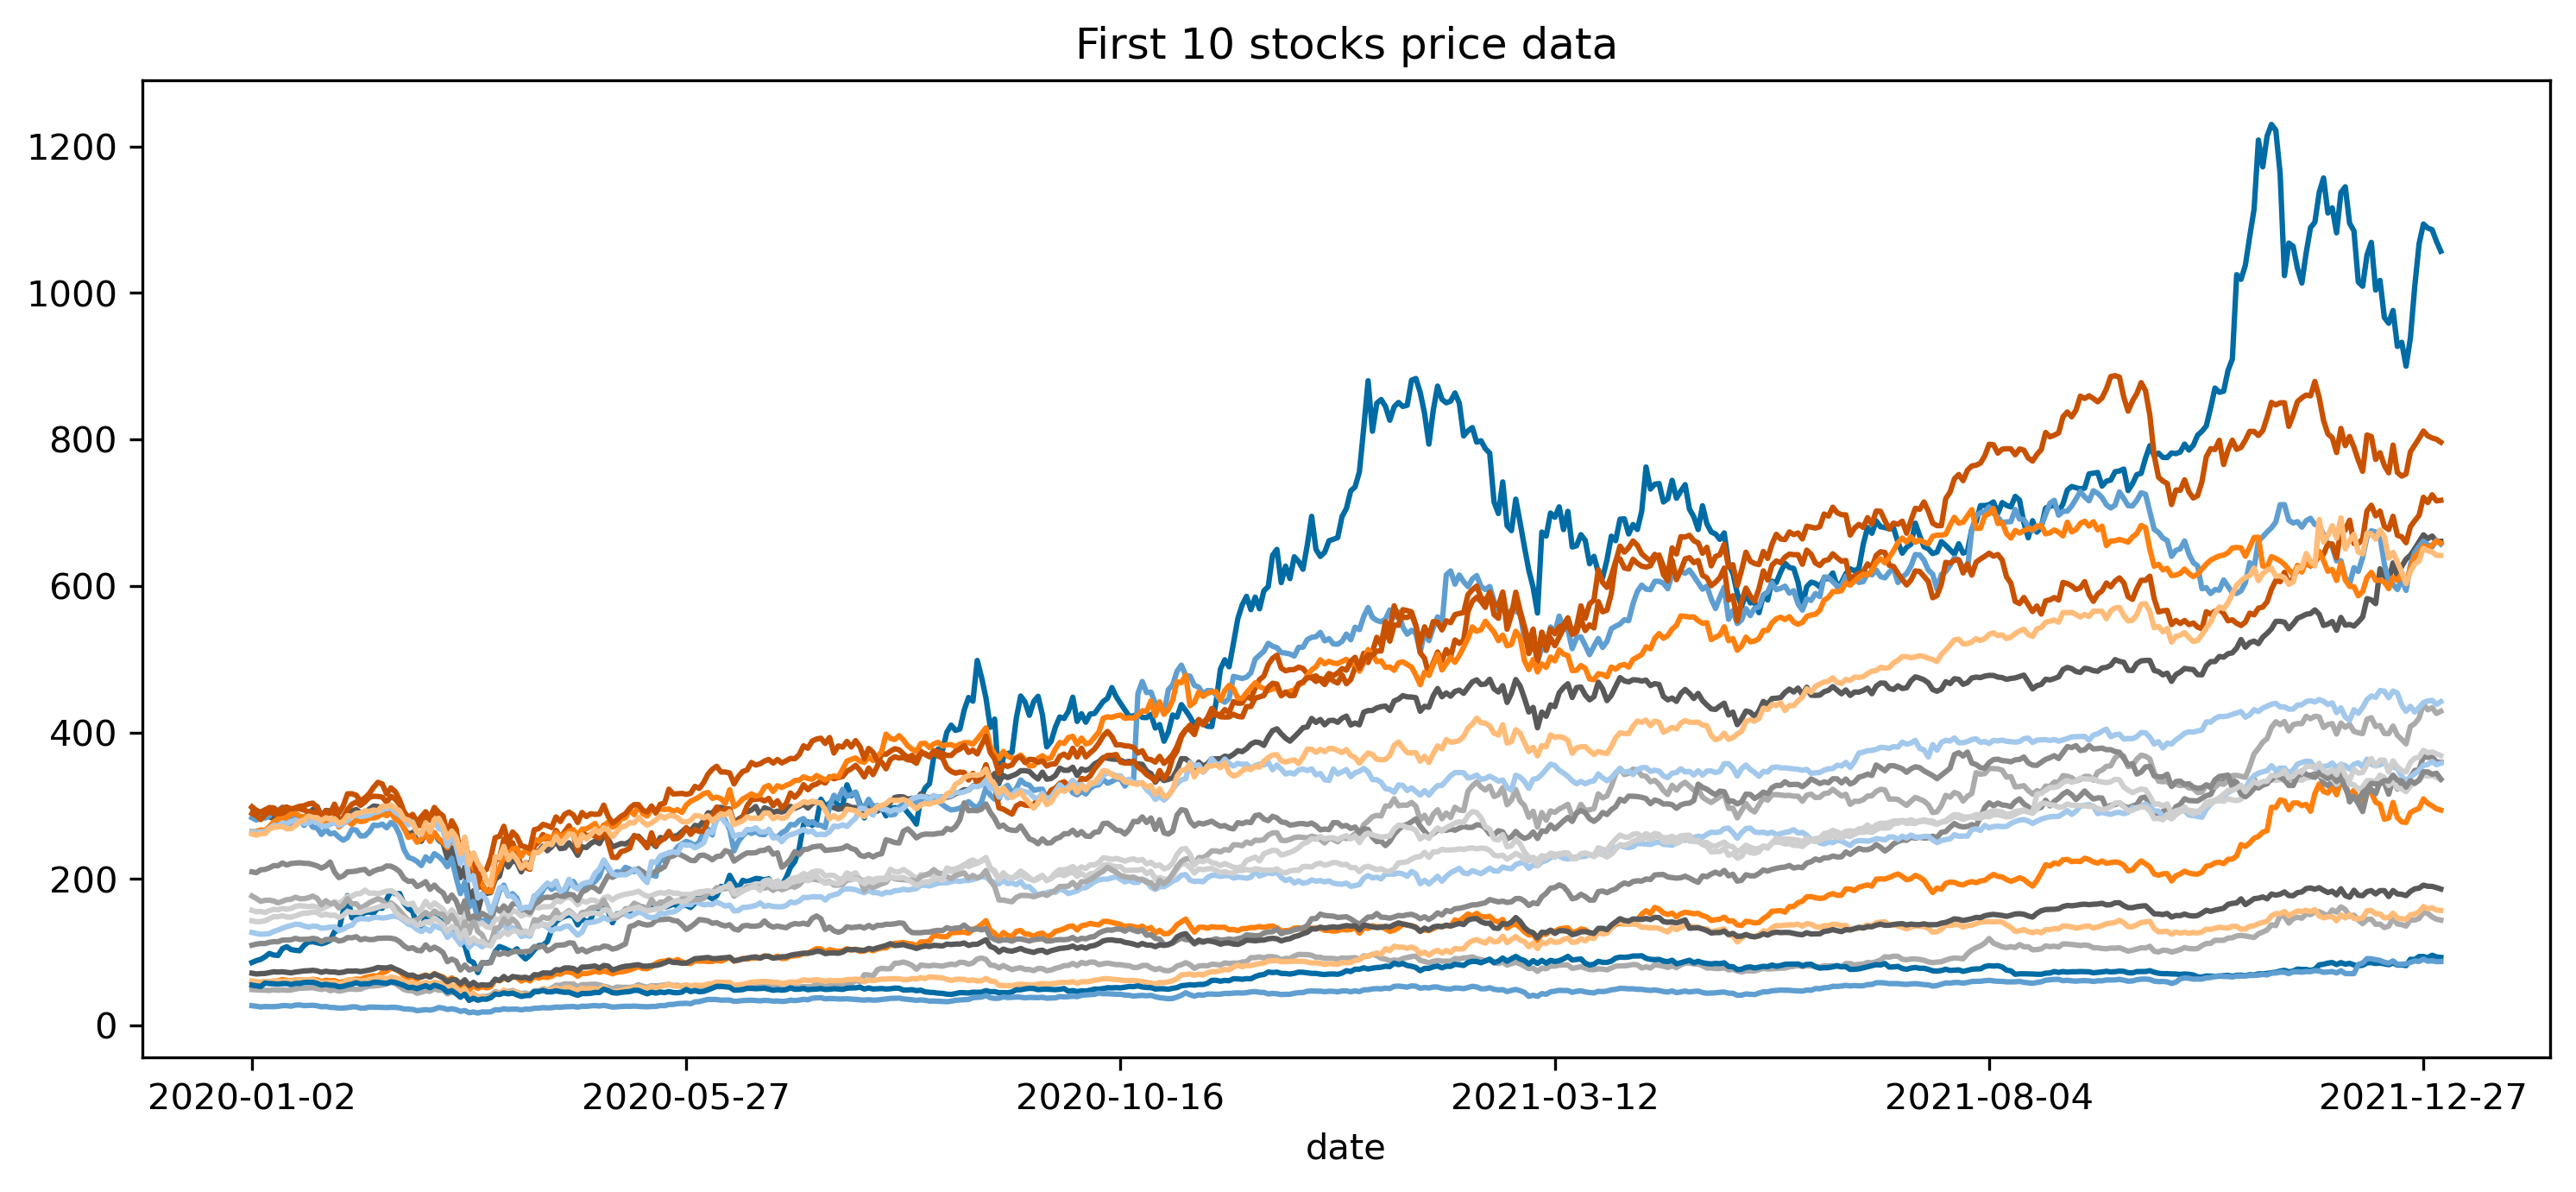

<Figure size 3600x1500 with 0 Axes>

In [109]:
start_date = '2020-01-01'
pred.plot(legend = False)
real_dt = port_dt[start_date:]
real_dt.plot(legend = False)
plt.title('First 10 stocks price data')
plt.show()
plt.savefig('./10stock.jpg')

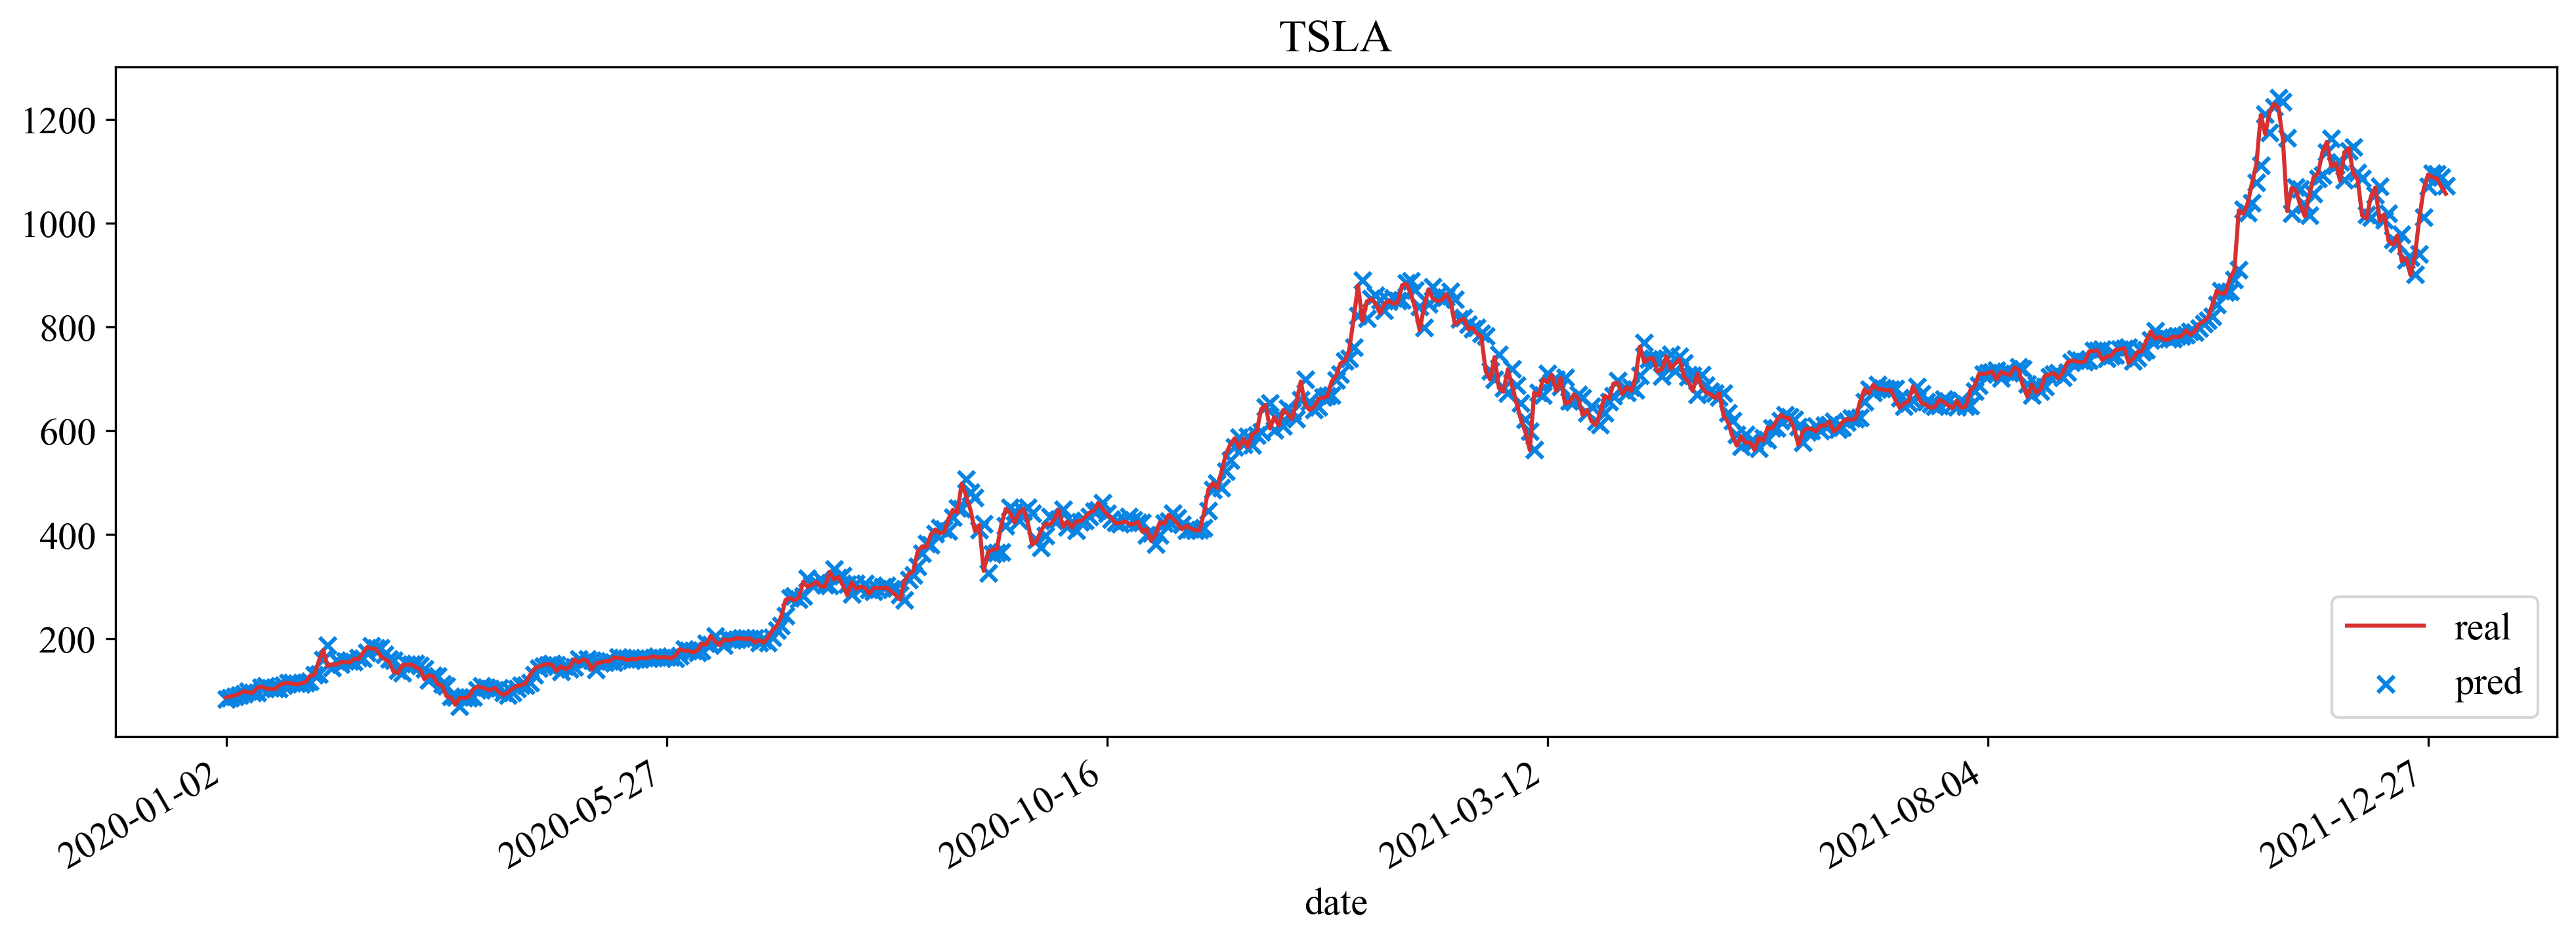

In [115]:
RED = '#d63031'
BLUE = '#0984e3'
fig = plt.figure(figsize = (16,5))
plt.rc('font',family='Times New Roman',size=14)
TSLA_real = real_dt['TSLA']
TSLA_pred = pred['TSLA']
TSLA_real.plot(color = RED , label = 'real')
plt.scatter(TSLA_pred.index,TSLA_pred,marker = 'x',color = BLUE,label = 'pred')
fig.autofmt_xdate()
plt.title('TSLA')
plt.legend(loc = 'lower right')
plt.savefig('./TSLA_a.jpg')


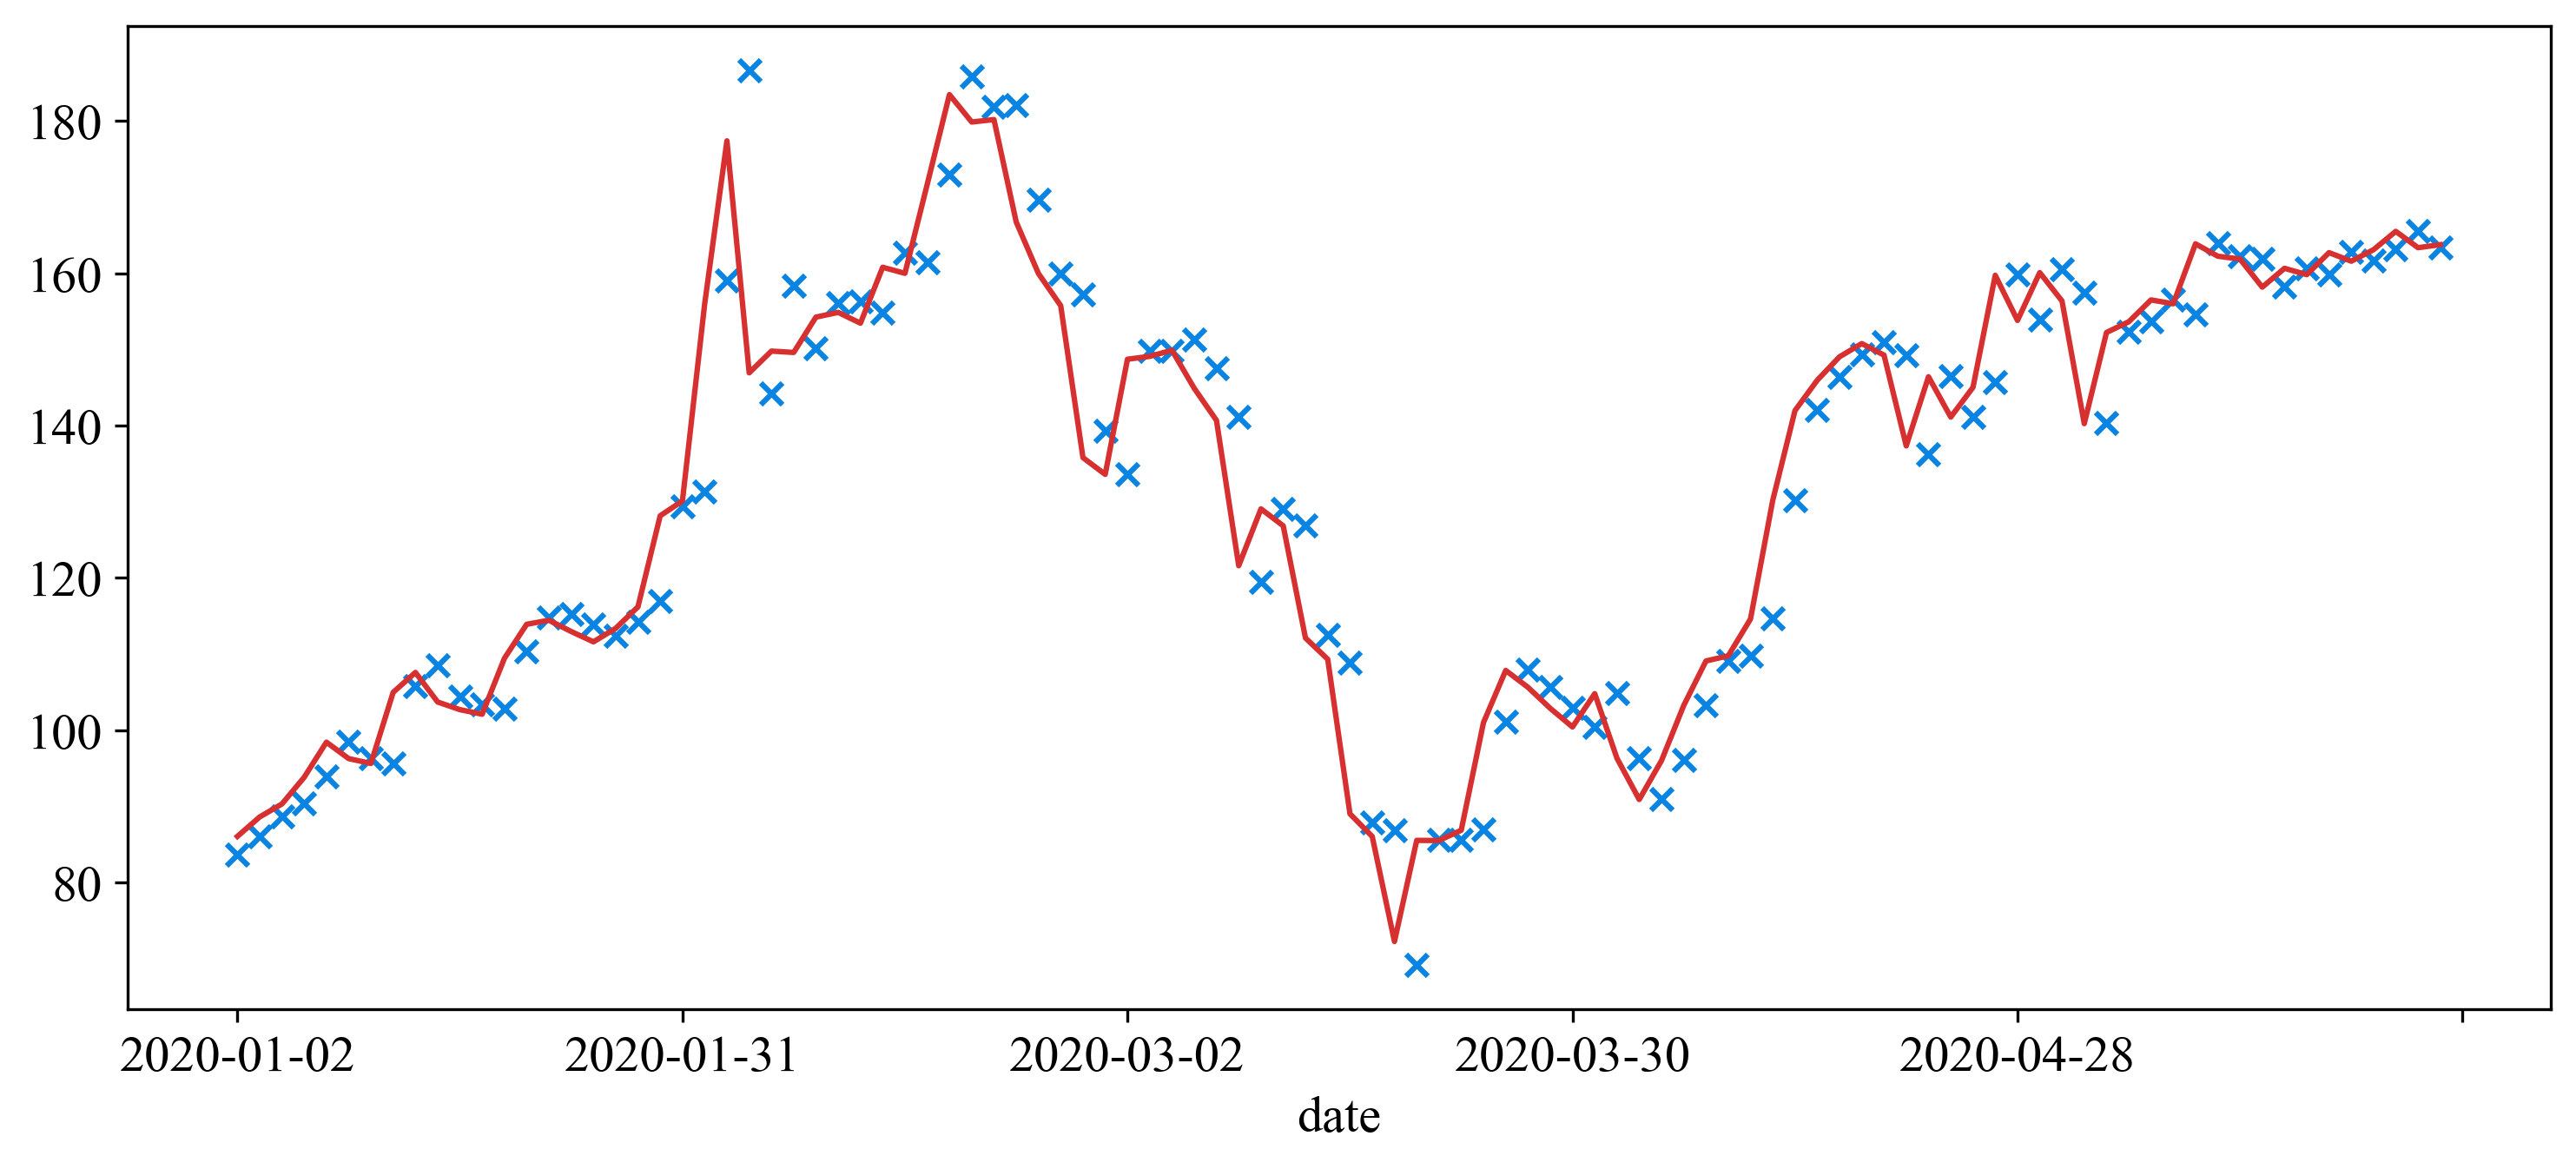

In [118]:
win = 100
TSLA_real[:win].plot(color = RED)
plt.scatter(TSLA_pred.index[:win],TSLA_pred[:win],marker = 'x',color = BLUE)
plt.savefig('./TSLA_d.jpg')

In [150]:
import random
z = np.random.sample([6,6])/10+3
z[0,0]= 2.94
z[0,1] = 2.21
z[0,2] = 3.68
z[0,3] = 3.29
z[0,4] = 5.15
z[0,5] = 3.78
z[1,0] = 2.86
z[1,1] = 2.01
z[1,2] = 3.74
z[1,3] = 1.97
z[1,4] = 2.38
z[1,5] = 1.98
z[2,0] = 2.25
z[2,1] = 2.17
z[2,2] = 2.65
z[2,3] = 1.77
z[2,4] = 3.95
z[2,5] = 2.30
z[3,0] = 2.57
z[3,1] = 1.98
z[3,2] = 2.70
z[3,3] = 1.96
z[3,4] = 1.93
z[3,5] = 2.19
z[4,0] = 2.30
z[4,1] = 2.09
z[4,2] = 2.59
z[4,3] = 2.02
z[4,4] = 1.89
z[4,5] = 2.27
z[5,0] = 2.35
z[5,1] = 2.01
z[5,2] = 1.91
z[5,3] = 1.89
z[5,4] = 1.95
z[5,5] = 2.03

In [151]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# z = z_data.values
sh_0, sh_1 = z.shape
rf, tc = np.linspace(0, 0.12, sh_0), np.linspace(0, 0.003, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=rf, y=tc)])
fig.update_layout(title='Sensitive test', autosize=True,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()